# Project Lab 1: Linear Regression

You will implement linear regression with one variable to predict profits for a restaurant franchise.

## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

## 2 - Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

## 3 - Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function loads the data into variables `x_train` and `y_train`
  - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.
  
<mark>Write code </mark>  for `load_data()` function. Use numpy loadtxt function.

In [2]:
def load_data():

    ### START CODE HERE ###
    data = np.loadtxt("data/ex1data1.txt", delimiter = ",")
    X = data [:,0]
    y = data [:, 1]
    ### END CODE HERE ###
    
    return X, y

# load the dataset
x_train, y_train = load_data()

#### View the variables

Print out each variable and see what it contains.

<mark>Write code </mark> that prints the variable `x_train` and the type of the variable.

In [3]:
# print x_train  and first five elements

### START CODE HERE ###
print("Type of x_train:", type(x_train))
print("First five elements of x_train are:")
print(x_train[:5])
### END CODE HERE ###

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
[6.1101 5.5277 8.5186 7.0032 5.8598]


**Expected Output**
```
Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
[6.1101 5.5277 8.5186 7.0032 5.8598]

```

`x_train` is a numpy array that contains decimal values that are all greater than zero.
- These values represent the city population times 10,000
- For example, 6.1101 means that the population for that city is 61,101
  
<mark>Write code </mark> for printing `y_train`

In [4]:
# print y_train and first five elements

### START CODE HERE ###
print("Type of y_train:", type(y_train))
print("First five elements of y_train are:")
print(y_train[:5])
### END CODE HERE ###

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
[17.592   9.1302 13.662  11.854   6.8233]


**Expected Output**
```
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
[17.592   9.1302 13.662  11.854   6.8233]
```

Similarly, `y_train` is a numpy array that has decimal values, some negative, some positive.
- These represent your restaurant's average monthly profits in each city, in units of \$10,000.
  - For example, 17.592 represents \$175,920 in average monthly profits for that city.
  - -2.6807 represents -\$26,807 in average monthly loss for that city.

#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

<mark>Write code </mark> for printing the shape of `x_train` and `y_train` and see how many training examples you have in your dataset.

In [5]:
### START CODE HERE ###
print("The shape of x_train is:", x_train.shape)
print("The shape of y_train is:", y_train.shape)
print("Number of training examples (m):", len(x_train)) 
### END CODE HERE ###

The shape of x_train is: (97,)
The shape of y_train is: (97,)
Number of training examples (m): 97


The city population array has 97 data points, and the monthly average profits also has 97 data points. These are NumPy 1D arrays.

**Expected Output**
```
The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97
```

#### Visualize your data

It is often useful to understand the data by visualizing it. 

For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).

<mark>Write code </mark> for plotting the data

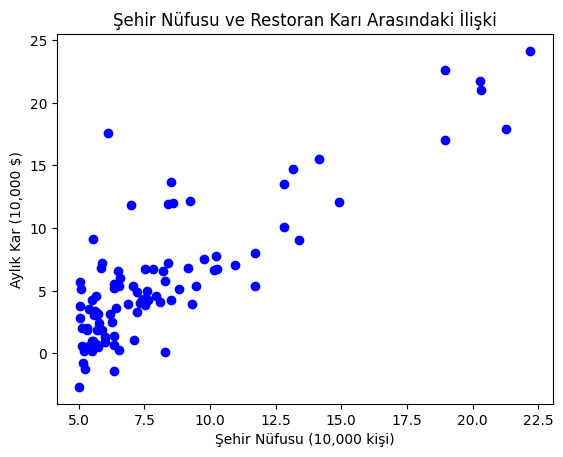

In [6]:
### START CODE HERE ###
plt.scatter(x_train, y_train, color='blue', marker='o', label="Veri noktaları")
plt.xlabel("Şehir Nüfusu (10,000 kişi)")
plt.ylabel("Aylık Kar (10,000 $)")
plt.title("Şehir Nüfusu ve Restoran Karı Arasındaki İlişki")
### END CODE HERE ###

plt.show()

<details>
  <summary><font size="3" color="white"><b>
  Expected Output (Click to Expand) 
  </b></font></summary>
   <img src="images/output-01.png" width="710" height="522">
</details>

Your goal is to build a linear regression model to fit this data. With this model, you can then input a new city's population, and have the model estimate your restaurant's potential monthly profits for that city.

## 4 - Compute Cost

In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function

For one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation

Please complete the `compute_cost()` function below to compute the cost $J(w,b)$.

<mark>Complete the code </mark> for `compute_cost` function below to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator


In [7]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
    

    ### START CODE HERE ###  
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        total_cost += cost
    total_cost = total_cost / (2 * m)
    ### END CODE HERE ### 

    return total_cost

You can check if your implementation was correct by running the following test code:

In [8]:
# DO NOT CHANGE THIS CELL

# Compute cost with some initial values for paramaters w, b

initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# Public tests
from public_tests import *
compute_cost_test(compute_cost)

# EXPECTED OUTPUT
# <class 'numpy.float64'>
# Cost at initial w: 75.203
# All tests passed!

<class 'numpy.float64'>
Cost at initial w: 75.203
All tests passed!


## 5 - Gradient descent 

In this section, you will implement the gradient for parameters $w, b$ for linear regression. 

<mark>complete the code </mark> for  `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The gradient for the parameters $w, b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

In [9]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ###
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i]) 
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    ### END CODE HERE ### 
        
    return dj_dw, dj_db

Run the cells below to check your implementation of the `compute_gradient` function with two different initializations of the parameters $w$,$b$.

In [10]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


**Expected Output**
```
Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!
```
<table>
  <tr>
    <td> <b>Gradient at initial , b (zeros)<b></td>
    <td> -65.32884975 -5.83913505154639</td> 
  </tr>
</table>

Now let's run the gradient descent algorithm implemented above on our dataset.

In [11]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at test w<b></td>
    <td> -47.41610118 -4.007175051546391</td> 
  </tr>
</table>

### Learning parameters using batch gradient descent 

You will now find the optimal parameters of a linear regression model by using batch gradient descent. "batch" refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [12]:
#  DO NOT EDIT THIS CELL

def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [13]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


**Expected Output**:
<table>
  <tr>
    <td> <b> w, b found by gradient descent<b></td>
    <td> 1.16636235 -3.63029143940436</td> 
  </tr>
</table>

## 6- Prediction 
We will now use the final parameters from gradient descent to plot the linear fit. 

We can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

<mark>Write code </mark> for calculating the predictions on the entire dataset, you can loop through all the training examples and calculate the prediction for each example.

In [14]:
# predicted is a numpy array for storing predictions

### START CODE HERE ###
predicted = np.zeros(x_train.shape)
for i in range(len(x_train)):
    predicted[i] = w * x_train[i] + b
### END CODE HERE ###

print(predicted)

[ 3.49629916  2.81700972  6.30548288  4.53797737  3.20435866  6.14720751
  5.08990004  6.37488144  3.93496804  2.2652037   3.03045403 12.89006489
  3.05763028  6.17694975  2.94880867  2.64403819  3.79407147  2.35326405
  3.86895193  4.61682347  3.58844178 20.0118734   2.7731545   3.74823343
  2.8603984  18.46644329 11.33180479  9.14954083 11.73769889 22.26645183
  2.49591017  4.05533663  7.15646085  3.24168226  5.94682646  5.62292763
  5.81246151  2.90868581 11.34113569  3.78007512  2.67611315  4.39719744
 10.02547896  3.10393486  5.49614404  4.64283335  2.28339895  3.1362431
 10.01614806  2.83322216  5.16431395  2.56041001  5.02866601  5.23767815
  3.75604805  3.78649011  3.68769922  2.94764231  7.22877531  7.39603168
  6.66332285  2.41064908 21.18873301 13.75783848 18.48277236  4.78874528
  6.04480089  8.30859358  2.78400167 20.09468513  8.19195734  4.92439322
  3.37511411  4.79772627  2.23289546  4.00693259  5.16244777  2.24409254
  8.35291535  2.32713754  3.05203174  2.42126298  3.

<details>
  <summary><font size="3" color="white"><b>
  Expected Output (Click to Expand) 
  </b></font></summary>
   
```
 [ 3.49629916  2.81700972  6.30548288  4.53797737  3.20435866  6.14720751
   5.08990004  6.37488144  3.93496804  2.2652037   3.03045403 12.89006489
   3.05763028  6.17694975  2.94880867  2.64403819  3.79407147  2.35326405
   3.86895193  4.61682347  3.58844178 20.0118734   2.7731545   3.74823343
   2.8603984  18.46644329 11.33180479  9.14954083 11.73769889 22.26645183
   2.49591017  4.05533663  7.15646085  3.24168226  5.94682646  5.62292763
   5.81246151  2.90868581 11.34113569  3.78007512  2.67611315  4.39719744
  10.02547896  3.10393486  5.49614404  4.64283335  2.28339895  3.1362431
  10.01614806  2.83322216  5.16431395  2.56041001  5.02866601  5.23767815
   3.75604805  3.78649011  3.68769922  2.94764231  7.22877531  7.39603168
   6.66332285  2.41064908 21.18873301 13.75783848 18.48277236  4.78874528
   6.04480089  8.30859358  2.78400167 20.09468513  8.19195734  4.92439322
   3.37511411  4.79772627  2.23289546  4.00693259  5.16244777  2.24409254
   8.35291535  2.32713754  3.05203174  2.42126298  3.78275775  7.76355245
   3.969609    6.30384997  7.07714821  3.37021539  2.80849528  2.27080224
   3.02695495  5.27675129  3.21707201  2.55772737  6.04281808 11.99196588
   2.71110402]
```
</details>

### Plotting
<mark>Write code </mark> for plotting the predicted values to see the linear fit.

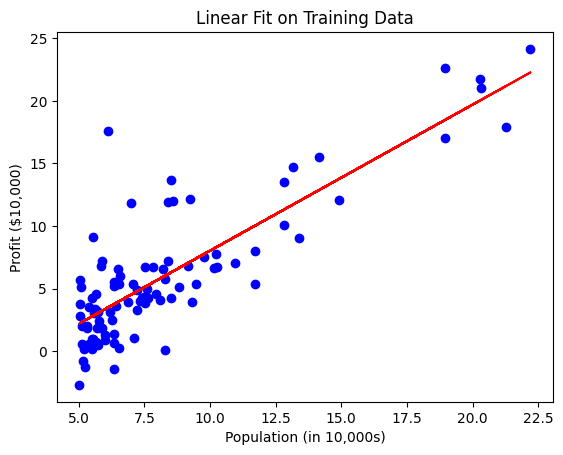

In [15]:
### START CODE HERE ###
plt.scatter(x_train, y_train, color = 'blue', label= 'Training data')
plt.plot(x_train, predicted, color = 'red', label= 'Linear fit')
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit ($10,000)')
plt.title('Linear Fit on Training Data')
plt.show()
### END CODE HERE ###

<details>
  <summary><font size="3" color="white"><b>
  Expected Output (Click to Expand) 
  </b></font></summary>
   <img src="images/output-02.png" width="710" height="522">
</details>

Your final values of $w,b$ can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people. 

- The model takes in population of a city in 10,000s as input. 

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`

 <mark>Write code </mark>  for these predictions.


In [16]:
### START CODE HERE ###
population35k = np.array([3.5])
profit_35k = w * population35k + b

population70k = np.array([7.0])
profit_70k = w * population70k + b

profit_35k_scaled = profit_35k * 10000
profit_70k_scaled = profit_70k * 10000

print(f"For population = 35,000, we predict a profit of ${profit_35k_scaled[0]:.2f}")
print(f"For population = 70,000, we predict a profit of ${profit_70k_scaled[0]:.2f}")
### END CODE HERE ###

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45


**Expected Output**:
<table>
  <tr>
    <td> <b> For population = 35,000, we predict a profit of<b></td>
    <td> $4519.77 </td> 
  </tr>
  
  <tr>
    <td> <b> For population = 70,000, we predict a profit of<b></td>
    <td> $45342.45 </td> 
  </tr>
</table>

**Congratulations on completing this project lab on Linear Regression**